In [1]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

data = pd.read_csv("Birds_Test_Dataset.csv")
data.head()

,BIRD INDEX,BIRD_NAME,SCIENTIFIC NAME,OBSERVATION COUNT,COUNTRY,STATE,COUNTY,LOCALITY,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,PROTOCOL TYPE,PROTOCOL CODE,REVIEWED,OBSERVATION YEAR,OBSERVATION MONTH,OBSERVATION DAY,STATUS
0,0,Bald Eagle,Haliaeetus leucocephalus,1,United States,Illinois,Adams,Lock and Dam 21 (Illinois),39.904217,-91.427192,25-12-1968,12:00:00,Stationary,P21,0,1968,12,25,Stable
1,1,Bald Eagle,Haliaeetus leucocephalus,1,United States,Illinois,Adams,Lock and Dam 21 (Illinois),39.904217,-91.427192,08-01-1978,NaN,Historical,P62,0,1978,1,8,Stable
2,2,Bald Eagle,Haliaeetus leucocephalus,1,United States,Illinois,Adams,Great River NWR,40.039508,-91.468935,14-10-2000,NaN,Historical,P62,0,2000,10,14,Stable
3,3,Bald Eagle,Haliaeetus leucocephalus,1,United States,Illinois,Adams,Plainville,39.785851,-91.185440,25-11-2002,NaN,Incidental,P20,0,2002,11,25,Stable
4,4,Bald Eagle,Haliaeetus leucocephalus,1,United States,Illinois,Adams,Lock and Dam 21 (Illinois),39.904217,-91.427192,27-12-2005,NaN,Incidental,P20,0,2005,12,27,Stable


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

# Assuming 'customer' is your DataFrame and it's already loaded
# X = customer.drop("Churn", axis=1) # Independent variables
# y = customer.Churn # Dependent variable

# Drop the 'Churn' column from the features to get X
X = data.drop(columns=[
    'BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 
    'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 
    'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

# Check for class imbalance
print("Class distribution in target variable:", Counter(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Print the classification report with zero_division parameter
print(classification_report(y_test, y_pred, zero_division=0))


Class distribution in target variable: Counter({'Bald Eagle': 5, 'Black-bellied Plover': 5, 'Double-crested Cormorant': 5, 'Indigo Bunting': 5, 'Red-headed Woodpecker': 5, 'Scarlet Tanager': 5, 'Northern Harrier': 5, 'Great Horned Owl': 5, 'Dunlin': 5, 'Snowy Owl': 5, 'Worm-eating Warbler': 5, 'Black-crowned Night-Heron': 5})
                       precision    recall  f1-score   support

           Bald Eagle       1.00      1.00      1.00         1
               Dunlin       0.75      1.00      0.86         3
     Great Horned Owl       1.00      0.50      0.67         2
     Northern Harrier       1.00      1.00      1.00         1
Red-headed Woodpecker       1.00      1.00      1.00         1
      Scarlet Tanager       1.00      1.00      1.00         1
            Snowy Owl       1.00      1.00      1.00         1
  Worm-eating Warbler       1.00      1.00      1.00         2

             accuracy                           0.92        12
            macro avg       0.97      0.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Prepare features and target
X = data.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

# SHAP analysis using TreeExplainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# SHAP force plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Prepare features and target
X = data.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

# SHAP analysis using TreeExplainer
explainer_tree = shap.TreeExplainer(rf_model)
shap_values_tree = explainer_tree.shap_values(X_test)

# SHAP analysis using KernelExplainer
explainer_kernel = shap.KernelExplainer(rf_model.predict_proba, X_train)
shap_values_kernel = explainer_kernel.shap_values(X_test)

# Display results or perform further analysis
print("TreeExplainer SHAP values shape:", shap_values_tree.shape)
print("KernelExplainer SHAP values shape:", shap_values_kernel.shape)


  0%|          | 0/12 [00:00<?, ?it/s]

TreeExplainer SHAP values shape: (12, 7, 12)
KernelExplainer SHAP values shape: (12, 7, 12)


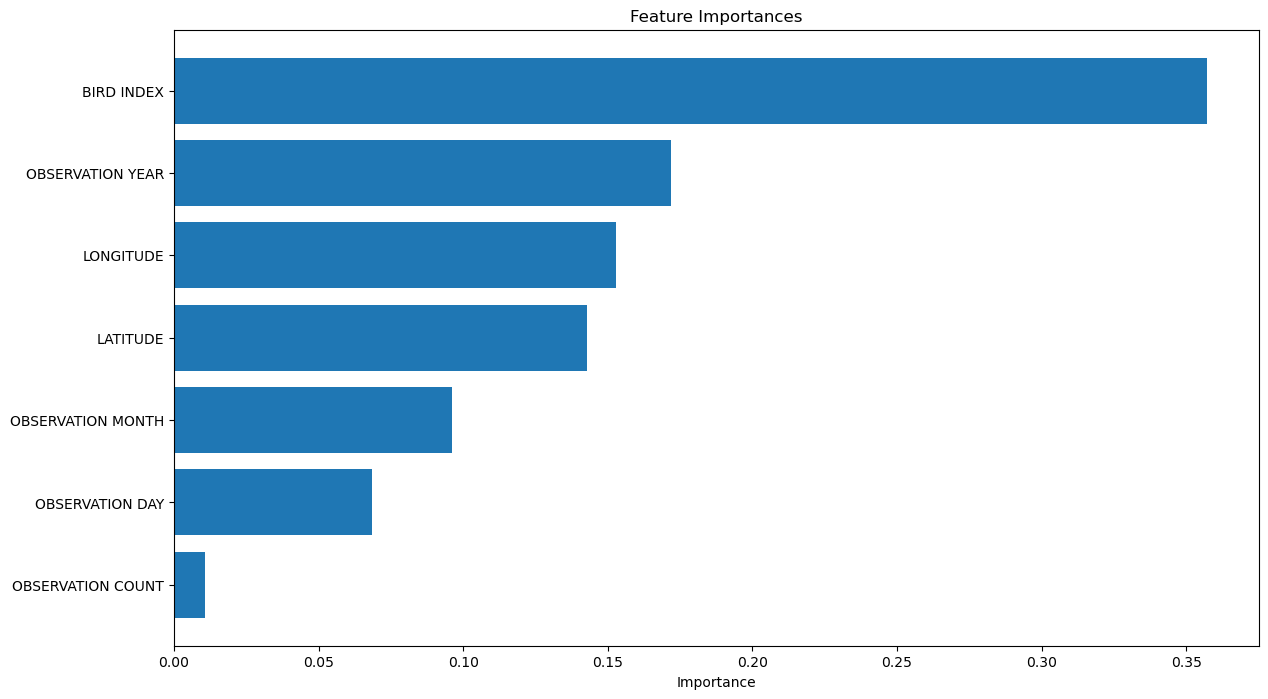

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Prepare features and target
X = data.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances using the trained model
importances = rf_model.feature_importances_

# Sort feature importances
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
feature_names = [X.columns[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(14, 8))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()


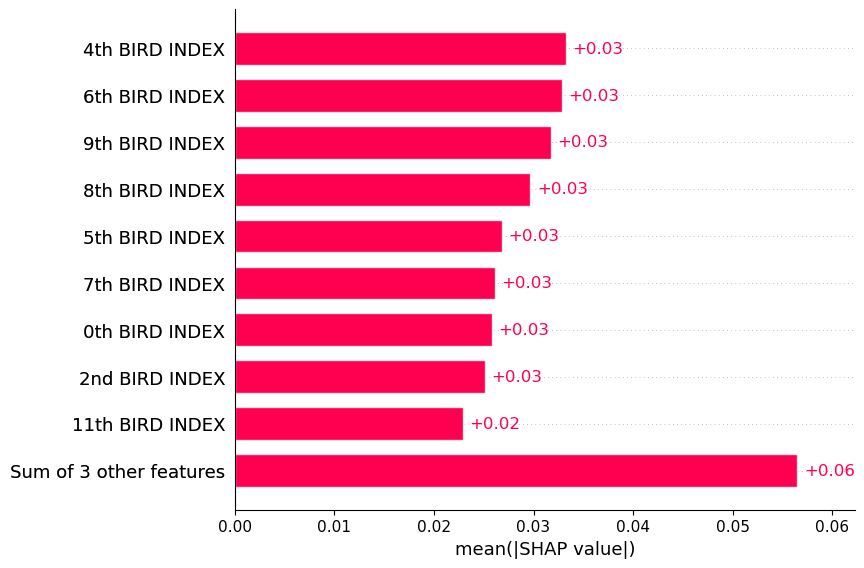

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Prepare features and target
X = data.drop(columns=['BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute the SHAP values for your dataset
shap_values = explainer.shap_values(X_train)

# Compute mean absolute SHAP values across all instances
mean_shap_values = np.mean(np.abs(shap_values), axis=0)

# Create an Explanation object with mean absolute SHAP values
explanation = shap.Explanation(values=mean_shap_values, base_values=explainer.expected_value, feature_names=X.columns)

# Generate the bar plot of SHAP values
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
shap.plots.bar(explanation, show=False)
plt.savefig('Absolute_Mean_SHAP_Plot.JPG', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot in the Jupyter Notebook


shap_values length: 48
shap_values[0] shape: (7, 12)
explainer.expected_value shape: 12


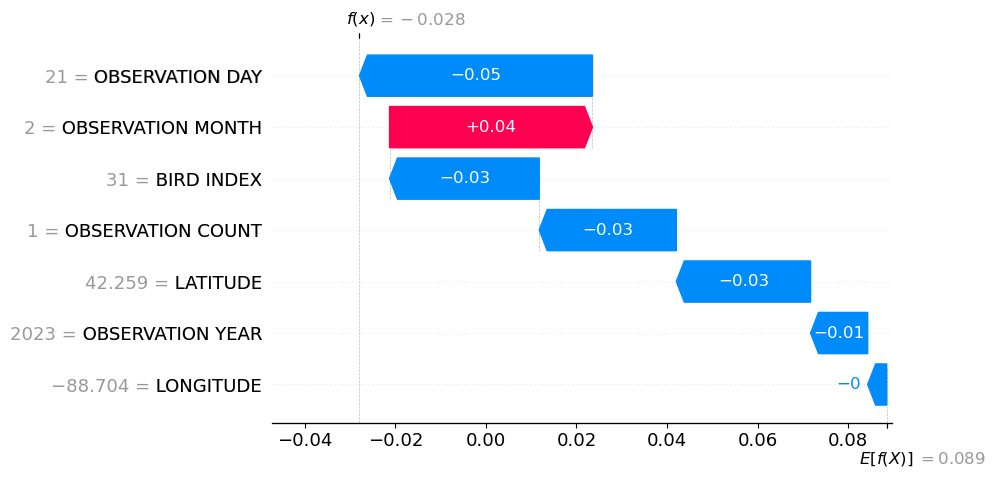

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Prepare features and target
X = data.drop(columns=[
    'BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 
    'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 
    'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute the SHAP values for your dataset
shap_values = explainer.shap_values(X_train)

# Print shapes for debugging
print("shap_values length:", len(shap_values))  # Number of classes
print("shap_values[0] shape:", shap_values[0].shape)  # Shape for the first class
print("explainer.expected_value shape:", len(explainer.expected_value))  # Shape of expected values

# Select the first class and the first observation for the SHAP values
class_index = 0  # Change if interested in a different class
observation_index = 0  # Change if interested in a different observation

# Check the actual number of features to avoid indexing errors
num_features = X_train.shape[1]

# Waterfall plot for the first observation of the selected class
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
shap.waterfall_plot(shap.Explanation(values=shap_values[class_index][observation_index][:num_features],
                                     base_values=explainer.expected_value[class_index],
                                     data=X_train.iloc[observation_index],
                                     feature_names=X_train.columns[:num_features]), show=False)
plt.savefig('Waterfall_Plot.JPG', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

# Load your dataset into a Pandas DataFrame
data = pd.read_csv('Birds_Test_Dataset_with_Predictions_CNN.csv')

# Drop columns that are not features or the target variable
data = data.drop(columns=[
    'BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 
    'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 
    'PROTOCOL CODE', 'STATUS'
], axis=1)

# Separate features (X) and target variable (y)
X = data.drop('PREDICTED_BIRD_NAME_CNN', axis=1)  # Features
y = data['PREDICTED_BIRD_NAME_CNN']  # Target variable

# Perform one-hot encoding on categorical columns in X using get_dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get the class names
class_names = clf.classes_.tolist()

# Explicitly set feature names for LimeTabularExplainer
feature_names = list(X_train.columns)

# Fit the LimeTabularExplainer on the training data with explicit feature names
explainer = LimeTabularExplainer(X_train.values, 
                                 feature_names=feature_names, 
                                 class_names=class_names, 
                                 mode='classification')

# Example explanation for a sample from the test set
sample_index = 0  # You can change this to any index in your test set
exp = explainer.explain_instance(X_test.values[sample_index], 
                                 clf.predict_proba, 
                                 num_features=len(feature_names))

# Print the explanation
print('Explanation for sample {}:'.format(sample_index))
for i in exp.as_list():
    print(i)


Explanation for sample 0:
('BIRD INDEX <= 15.75', 0.11614432780276676)
('1966.00 < OBSERVATION YEAR <= 2013.00', 0.04910807696692438)
('OBSERVATION MONTH > 7.25', -0.03273828184256037)
('OBSERVATION DAY > 23.25', 0.02270709167992629)
('OBSERVATION COUNT <= 1.00', -0.005264615724666078)
('LONGITUDE <= -91.42', 0.002378611361945496)
('39.79 < LATITUDE <= 39.91', -4.315451567787061e-05)


C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
#CLASSIFICATION WITH SCIKIT-LEARN WITH SHAP ANALYSIS 
import sklearn

import shap

In [10]:
data = pd.read_csv('Birds_Test_Dataset.csv', low_memory=False)

# Prepare features and target
X = data.drop(columns=[
    'BIRD_NAME', 'REVIEWED', 'PROTOCOL TYPE', 'SCIENTIFIC NAME', 'COUNTRY', 
    'STATE', 'COUNTY', 'LOCALITY', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 
    'PROTOCOL CODE', 'STATUS'], axis=1)
y = data['BIRD_NAME']

X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [11]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
def f(x):
    return knn.predict_proba(x)[:, 1]


med = X_train.median().values.reshape((1, X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:80, :])

C:\Users\sahan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


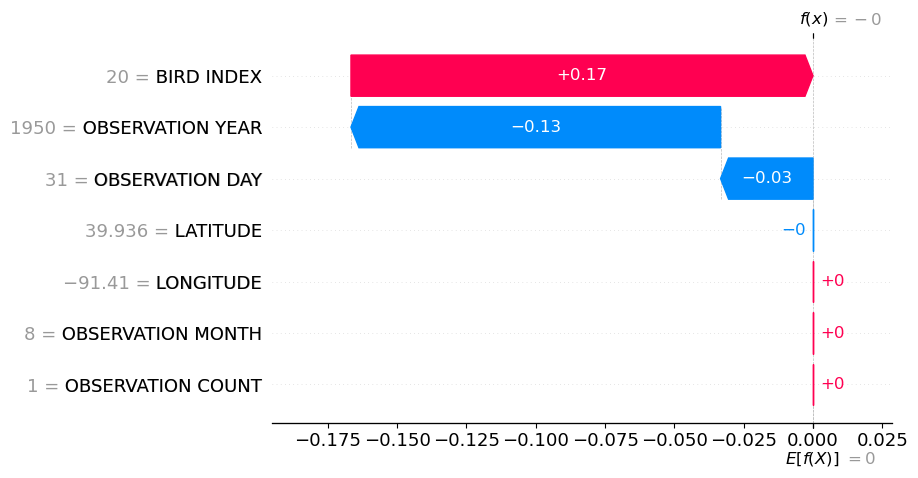

In [60]:
shap.plots.waterfall(shap_values[1])

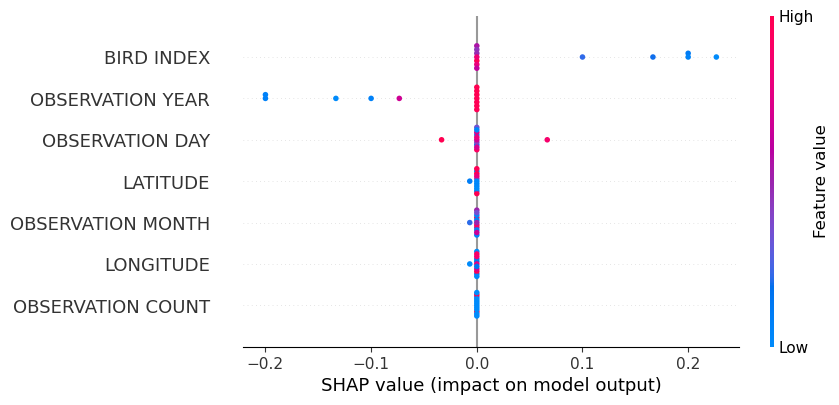

In [61]:
shap.plots.beeswarm(shap_values)

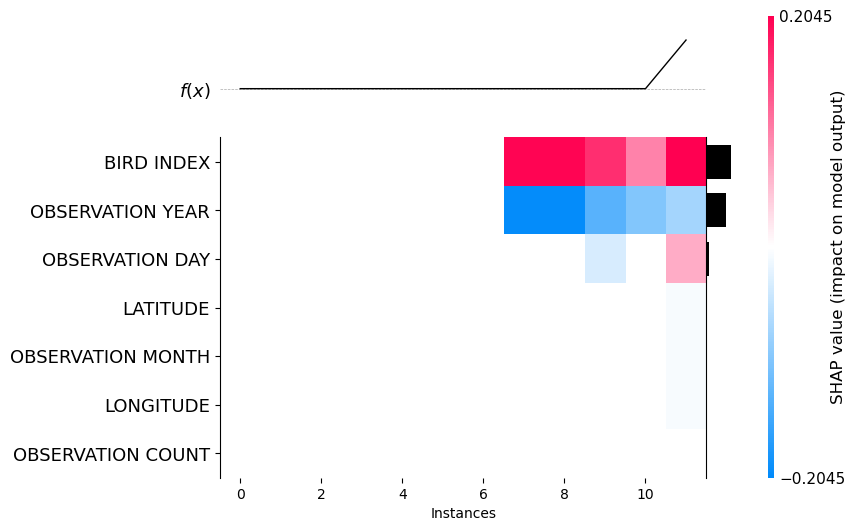

<Axes: xlabel='Instances'>

In [62]:
shap.plots.heatmap(shap_values)
